## Final Project Submission

Please fill out:
* Student name: Stephen Turk
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [248]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import zipfile

Looking at using provided data as well as expanding to other datasets.
There seems to be an issue with changing requirements surrounding IMDB giving access to their API.
I would also like to investigate further into streaming and how these models generate revenue and whether the "box office film industry" is a reasonable place to invest money with streaming growing in popularity.

Looking at Netflix rather than Disney as an example of immediately available growth as well as a roadmap to future growth for Microsoft seems, pretty clear. Microsoft already has a fledgling streaming service offered by their xbox streaming platform as well as global reach to computers via their Windows platform.
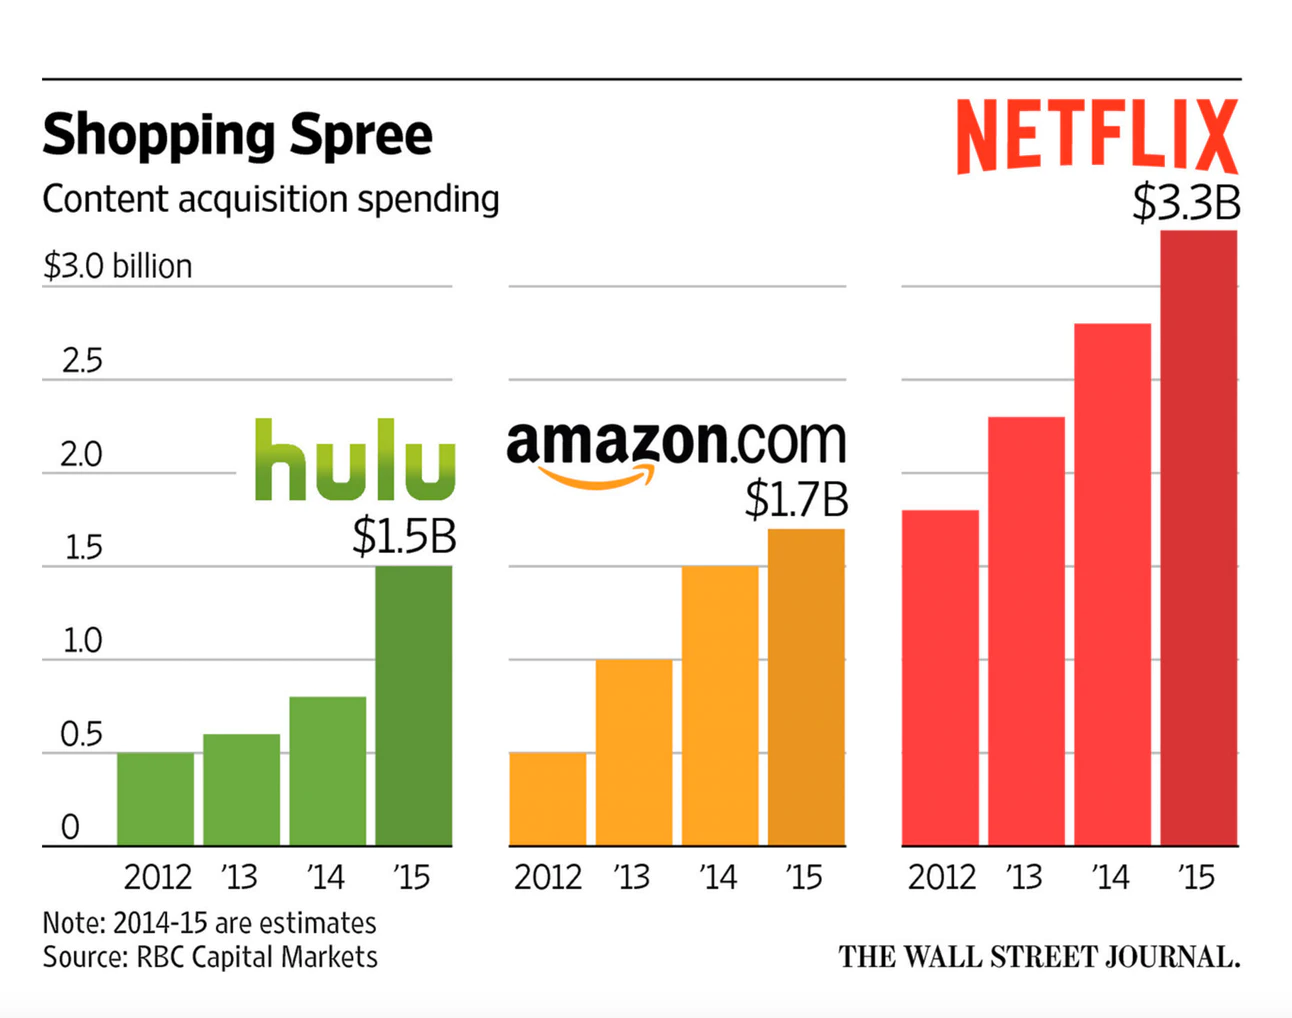


In [7]:
imdbtb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [231]:
len(imdbtb)

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


146144

In [9]:
imdbtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
imdbtb['genres'].nunique()


1085

In [11]:
genre_list = imdbtb['genres']

In [12]:
split_genre_list = []
for item in genre_list:
    item = str(item).split(',')
    split_genre_list += item
    

len(split_genre_list)

234958

In [176]:
unique_genres = set(split_genre_list)

In [18]:
genre_dict = {}

for genre in unique_genres:
    genre_dict[genre] = split_genre_list.count(genre)
genre_dict

{'Music': 4314,
 'Short': 11,
 'Drama': 49883,
 'Sci-Fi': 3365,
 'Romance': 9372,
 'Adult': 25,
 'Reality-TV': 98,
 'Talk-Show': 50,
 'Western': 467,
 'Thriller': 11883,
 'Biography': 8722,
 'Horror': 10805,
 'Fantasy': 3516,
 'nan': 5408,
 'Action': 10335,
 'News': 1551,
 'Adventure': 6465,
 'Documentary': 51640,
 'Crime': 6753,
 'Game-Show': 4,
 'Comedy': 25312,
 'Family': 6227,
 'Mystery': 4659,
 'Sport': 2234,
 'War': 1405,
 'Musical': 1430,
 'Animation': 2799,
 'History': 6225}

In order to guage relative populartity of each genre it was necessary to sort by number of examples of each genre. It is also important to remember that the method used to split genres will create more examples of each genre total than there are movies because movies can have more than one genre identifyer.

In [264]:
sorted_genres = {keys: values for keys, values in sorted(genre_dict.items(), key = lambda item: item[1], reverse = True)}

In [266]:
sorted_genres_df = pd.DataFrame.from_dict(sorted_genres, orient='index')

In [272]:
sorted_genres_df = sorted_genres_df.rename(columns={0: "Number of Movies"})

In [273]:
sorted_genres_df

,Number of Movies
Documentary,51640
Drama,49883
Comedy,25312
Thriller,11883
Horror,10805
Action,10335
Romance,9372
Biography,8722
Crime,6753
Adventure,6465


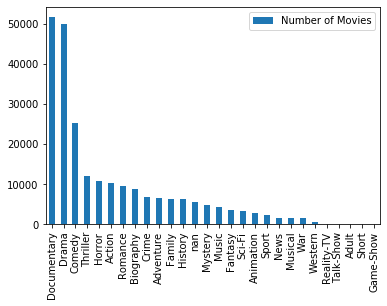

In [274]:
sorted_genres_df.plot(kind='bar')

In [276]:
yearly_rev_df = pd.read_csv('yearly_revenue_w_inflation.csv')

In [278]:
yearly_rev_df.columns = yearly_rev_df.iloc[0]

In [ ]:
def clean_currency(): #created this function to remove "$" and "," from currency    
        if isinstance(x, str): #used isinstance because if any data was already int or float64 it was changing the data to NaN
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [306]:
yearly_rev_df[yearly_rev_df.columns[2:]] = yearly_rev_df[yearly_rev_df.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)
#using lambda expression to strip all '$' and ',' from financial numbers.
#def clean_currency(): #created this function to remove "$" and "," from currency    
 #       if isinstance(x, str): #used isinstance because if any data was already int or float64 it was changing the data to NaN
  #      return(x.replace('$', '').replace(',', ''))
   # return(x)

In [307]:
yearly_rev_df

,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price
1,2020,"985,155,965",8.974771e+09,8.974771e+09,9.11
2,2019,"1,246,269,158",1.135351e+10,1.135351e+10,9.11
3,2018,"1,311,323,188",1.194616e+10,1.194616e+10,9.11
4,2017,"1,225,639,438",1.099399e+10,1.116558e+10,8.97
5,2016,"1,301,658,904",1.125935e+10,1.185811e+10,8.65
6,2015,"1,323,266,320",1.115514e+10,1.205496e+10,8.43
7,2014,"1,257,400,618",1.027297e+10,1.145492e+10,8.17
8,2013,"1,339,168,926",1.088745e+10,1.219983e+10,8.13
9,2012,"1,381,106,440",1.099361e+10,1.258188e+10,7.96
10,2011,"1,282,891,720",1.017333e+10,1.168714e+10,7.93


In [289]:
yearly_rev_df = yearly_rev_df.dropna(axis=1)

In [313]:

yearly_rev_df

,Year,Tickets Sold,Total Box Office,Inflation Adjusted BO
1,2020,"985,155,965",8.974771e+09,8.974771e+09
2,2019,"1,246,269,158",1.135351e+10,1.135351e+10
3,2018,"1,311,323,188",1.194616e+10,1.194616e+10
4,2017,"1,225,639,438",1.099399e+10,1.116558e+10
5,2016,"1,301,658,904",1.125935e+10,1.185811e+10
6,2015,"1,323,266,320",1.115514e+10,1.205496e+10
7,2014,"1,257,400,618",1.027297e+10,1.145492e+10
8,2013,"1,339,168,926",1.088745e+10,1.219983e+10
9,2012,"1,381,106,440",1.099361e+10,1.258188e+10
10,2011,"1,282,891,720",1.017333e+10,1.168714e+10


In [292]:
yearly_rev_df = yearly_rev_df.drop([0])

In [308]:
yearly_rev_df

,Year,Tickets Sold,Total Box Office,Total Inflation\nAdjusted Box Office,Average\nTicket Price
1,2020,"985,155,965",8.974771e+09,8.974771e+09,9.11
2,2019,"1,246,269,158",1.135351e+10,1.135351e+10,9.11
3,2018,"1,311,323,188",1.194616e+10,1.194616e+10,9.11
4,2017,"1,225,639,438",1.099399e+10,1.116558e+10,8.97
5,2016,"1,301,658,904",1.125935e+10,1.185811e+10,8.65
6,2015,"1,323,266,320",1.115514e+10,1.205496e+10,8.43
7,2014,"1,257,400,618",1.027297e+10,1.145492e+10,8.17
8,2013,"1,339,168,926",1.088745e+10,1.219983e+10,8.13
9,2012,"1,381,106,440",1.099361e+10,1.258188e+10,7.96
10,2011,"1,282,891,720",1.017333e+10,1.168714e+10,7.93


In [317]:
yearly_rev_df.rename(columns = {'Inflation Adjusted BO':'Inflation Adjusted Box Office'}, inplace = True)




In [319]:
yearly_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 4 columns):
Year                             26 non-null object
Tickets Sold                     26 non-null object
Total Box Office                 26 non-null float64
Inflation Adjusted Box Office    26 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [21]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [80]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [77]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [78]:
bom_movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [79]:
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [104]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [105]:
len(tn_movie_budgets)

5782

In [106]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [239]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636


In [238]:
tn_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,16458.272727


In [34]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [107]:
tn_movie_budgets[tn_movie_budgets.columns[3:]] = tn_movie_budgets[tn_movie_budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
tn_movie_budgets.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [240]:
tn_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,16458.272727


In [81]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,percentage_gain
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.800161
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.492296
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,1.708310
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,3.758346
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,1800.000000


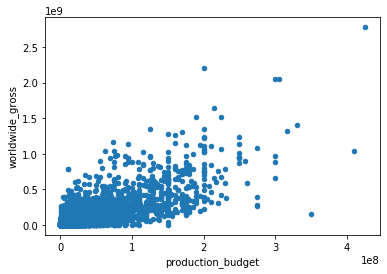

In [249]:
tn_movie_budgets.plot('production_budget', 'worldwide_gross', kind='scatter');

In [108]:
tn_movie_budgets['percentage_gain'] = (tn_movie_budgets['worldwide_gross'] / tn_movie_budgets['production_budget']) *100


In [109]:
tn_movie_budgets.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,671.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,682.711400
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,321.140142
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,218.648403
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,293.206974


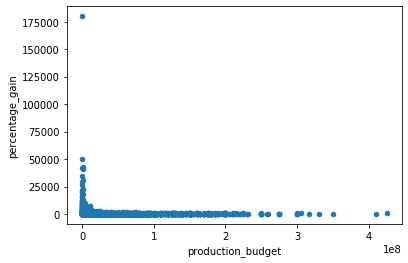

In [97]:
tn_movie_budgets.plot('production_budget', 'percentage_gain', kind='scatter');

In [102]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,percentage_gain
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,480.016137
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2953.028231
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,49.229560
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,170.830983
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,375.834608
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,180000.000000


In [101]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
percentage_gain      0
dtype: int64

In [100]:
tn_movie_budgets_money_back = tn_movie_budgets['percentage_gain' >= 100]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [127]:
sorted_by_pergain = tn_movie_budgets.sort_values(by='percentage_gain', ascending=False)


In [144]:
sorted_by_pergain['worldwide_gross'].value_counts()

0            367
8000000        9
2000000        6
7000000        6
11000000       4
            ... 
47158652       1
29197694       1
166000000      1
42843521       1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [241]:
sorted_by_pergain['worldwide_gross'] == 0

no_ww_gross = sorted_by_pergain[sorted_by_pergain['worldwide_gross'] == 0].index
    
    # Delete these row indexes from dataFrame
sorted_by_pergain.drop(no_ww_gross , inplace=True)

In [242]:
sorted_by_pergain.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain,made_back_investment
5335,36,2014-11-21,Food Chains,913000,0,176,0.019277,False
2152,53,1997-08-24,The Grimm Brothers' Snow White,26000000,5000,5000,0.019231,False
3818,19,2015-05-08,Skin Trade,9000000,1242,1242,0.013800,False
4081,82,2010-05-21,Perrierâs Bounty,6600000,828,828,0.012545,False
5302,3,2015-12-11,American Hero,1000000,0,26,0.002600,False


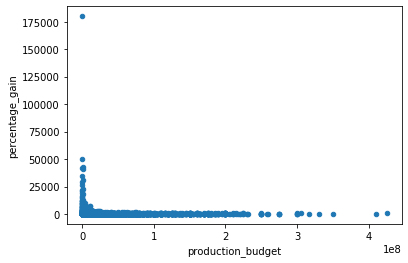

In [149]:
sorted_by_pergain.plot('production_budget', 'percentage_gain', kind='scatter');

In [131]:
sorted_by_pergain['release_date'] = pd.to_datetime(sorted_by_pergain['release_date'])
# pd.to_datetime(df['DATE']).head() 

In [153]:
sorted_by_pergain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 5745 to 5302
Data columns (total 8 columns):
id                      5415 non-null int64
release_date            5415 non-null datetime64[ns]
movie                   5415 non-null object
production_budget       5415 non-null int64
domestic_gross          5415 non-null int64
worldwide_gross         5415 non-null int64
percentage_gain         5415 non-null float64
made_back_investment    5415 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 343.7+ KB


In [137]:
def made_back_investment(value):
    if value >= 100:
        return True
    else:
        return False
    
   

In [139]:
sorted_by_pergain['made_back_investment'] = sorted_by_pergain['percentage_gain'].map(made_back_investment)
sorted_by_pergain.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_gain,made_back_investment
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,180000.000000,True
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,49875.000000,True
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,43151.785333,True
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,41656.474000,True
5406,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,41383.333333,True
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,34205.858462,True
5346,47,1942-08-13,Bambi,858000,102797000,268000000,31235.431235,True
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,29170.400000,True
5676,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,26392.161404,True
5210,11,1976-11-21,Rocky,1000000,117235147,225000000,22500.000000,True


In [156]:
opus_data = pd.read_csv('OpusMovieData.csv')

In [199]:
opus_data['genre']

0          Comedy
1          Action
2           Drama
3          Comedy
4          Horror
          ...    
1931    Adventure
1932       Action
1933    Adventure
1934       Action
1935    Adventure
Name: genre, Length: 1936, dtype: object

In [159]:
opus_data['total_box_office'] = (opus_data['domestic_box_office'] + opus_data['international_box_office'])

In [162]:
opus_data['percentage_gain'] = ((opus_data['total_box_office'] / opus_data['production_budget']) *100)

In [163]:
opus_data.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,percentage_gain
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521,633.20521
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721,324.30721
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041,119.24041
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,267.16191
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815,1638.76815


In [234]:
opus_data_sorted_by_pergain = opus_data.sort_values(by='percentage_gain', ascending=False)
opus_data_sorted_by_pergain.head(30)

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,total_box_office,percentage_gain
931,Les Intouchables,2011,164220100,10800000,13182281,471690764,R,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,110.0,484873045,4489.565231
733,The King’s Speech,2010,143880100,15000000,138797449,292023719,R,Dramatization,Original Screenplay,Live Action,Drama,0.0,118.0,430821168,2872.141120
338,Slumdog Millionaire,2008,2110100,14000000,141330703,243199737,R,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,116.0,384530440,2746.646000
1348,The Fault in Our Stars,2014,198430100,12000000,124872350,182294484,PG-13,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Drama,0.0,125.0,307166834,2559.723617
723,Black Swan,2010,140330100,13000000,106954678,224312032,R,Contemporary Fiction,Original Screenplay,Live Action,Thriller/Suspense,0.0,108.0,331266710,2548.205462
1897,Halloween,2018,264970100,10000000,159342015,93797291,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,105.0,253139306,2531.393060
326,High School Musical 3: Senior Year,2008,4880100,11000000,90559416,183833464,G,Contemporary Fiction,Based on TV,Live Action,Musical,1.0,112.0,274392880,2494.480727
1669,La La Land,2016,230150100,20000000,151101803,275581874,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Musical,0.0,128.0,426683677,2133.418385
1661,Annabelle: Creation,2016,255340100,15000000,102092201,203292664,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,109.0,305384865,2035.899100
1833,It,2017,264810100,35000000,327481748,369976221,R,Historical Fiction,Remake,Live Action,Horror,0.0,135.0,697457969,1992.737054


In [207]:
opus_data_for_graph = opus_data_sorted_by_pergain.groupby('genre').mean()
opus_data_for_graph

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,total_box_office,percentage_gain
genre,,,,,,,,,
Action,2011.926045,1.434299e+08,8.818135e+07,9.684900e+07,1.832826e+08,0.309677,115.287162,2.801316e+08,267.825670
Adventure,2011.610778,1.325259e+08,9.606168e+07,1.126963e+08,1.930141e+08,0.267267,101.851852,3.057104e+08,300.047728
Black Comedy,2012.125000,1.647518e+08,3.275000e+07,3.651481e+07,4.467123e+07,0.000000,112.952381,8.118604e+07,261.728773
Comedy,2010.955975,1.263926e+08,3.275189e+07,5.051509e+07,3.803244e+07,0.116352,102.525253,8.854753e+07,293.740632
Concert/Performance,2012.000000,1.595568e+08,1.300000e+07,2.785387e+07,1.533291e+07,0.000000,94.333333,4.318678e+07,363.427141
Documentary,2009.200000,1.177141e+08,4.380000e+07,2.757766e+07,6.770103e+07,0.000000,84.200000,9.527869e+07,177.239619
Drama,2011.000000,1.372221e+08,3.104639e+07,3.561566e+07,4.124104e+07,0.044586,116.626728,7.685670e+07,250.895871
Horror,2010.692308,1.217080e+08,2.630337e+07,4.535191e+07,5.138038e+07,0.307692,100.641304,9.673229e+07,475.147440
Musical,2011.360000,1.257697e+08,7.728800e+07,1.235329e+08,2.011386e+08,0.080000,116.826087,3.246715e+08,489.025327


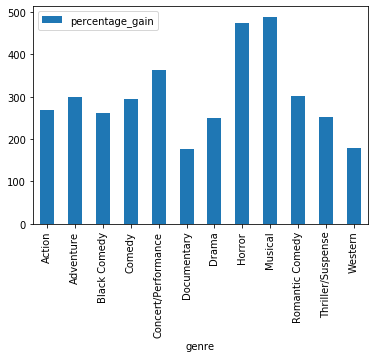

In [233]:
opus_data_for_graph.reset_index().plot('genre', 'percentage_gain', kind='bar')

In [235]:
opus_data.groupby('sequel').mean()

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,running_time,total_box_office,percentage_gain
sequel,,,,,,,,
0.0,2011.082367,1.324311e+08,4.536877e+07,5.100934e+07,6.744951e+07,108.720130,1.184588e+08,259.949190
1.0,2012.213559,1.433441e+08,9.833559e+07,1.387180e+08,2.509730e+08,113.003571,3.896910e+08,429.787431


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [243]:
google_interest_ww = pd.read_csv('film_vs_stream_ww.csv')

In [246]:
google_interest_ww.plot

,,,,,Category: Arts & Entertainment
Day,Witcher: (Worldwide),Spenser Confidential: (Worldwide),Birds of Prey: (Worldwide),6 Underground: (Worldwide),Onward: (Worldwide)
2019-12-10,2,0,<1,2,<1
2019-12-11,2,0,1,3,<1
2019-12-12,4,0,1,4,<1
2019-12-13,3,0,1,47,<1


In [247]:
google_interest_usa = pd.read_csv('film_vs_stream_usa.csv')

In [260]:
google_interest_usa.shape

(91, 1)

In [252]:
plt.plot(google_interest_usa[1])
plt.plot(google_interest_usa[2])
plt.plot(google_interest_usa[3])
plt.plot(google_interest_usa[4])
plt.plot(google_interest_usa[5])
plt.show()

KeyError: 1